<img src="logo.jpg" alt="Logo" style="display:block; margin-left:auto; margin-right:auto;">

<div style="text-align: center;">
    <h2><font color='black'>Akıllı Balık Çiftliği Projesi</font></h2>
</div>
<br>

## <font color = 'red'>Veri Analizi

### Kullanılan Python Kütüphaneleri

In [5]:
# Sayısal işlemler ve matematiksel hesaplamalar için
import numpy as np

# Veri manipülasyonu ve analiz için
import pandas as pd

# Veri görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları bastırmak için
import warnings
warnings.filterwarnings("ignore")

### Veri Setinin Yüklenmesi

In [7]:
# Veri setini okuma ve yükleme
train_df = pd.read_csv("realfishdataset.csv")

### Veri Setimizdeki Sütunlar

In [9]:
train_df.columns

Index(['ph', 'temperature', 'turbidity', 'fish'], dtype='object')

### İlk 5 Satırın Görünümü

In [11]:
train_df.head()

,ph,temperature,turbidity,fish
0,6.0,27.0,4.0,katla
1,7.6,28.0,5.9,sing
2,7.8,27.0,5.5,sing
3,6.5,31.0,5.5,katla
4,8.2,27.0,8.5,prawn


### Verilerin İstatiksel Değeri

In [13]:
train_df.describe()

,ph,temperature,turbidity
count,40280.000000,40280.000000,40280.000000
mean,7.512655,22.000871,4.463909
std,0.810823,4.575368,2.132095
min,5.500000,4.000000,1.000000
25%,6.950000,18.000000,3.480000
50%,7.500000,21.120000,3.570000
75%,8.180000,25.000000,4.120000
max,9.000000,35.000000,15.800000


### Veri Tipleri, Boş Veri Var Mı?

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40280 entries, 0 to 40279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           40280 non-null  float64
 1   temperature  40280 non-null  float64
 2   turbidity    40280 non-null  float64
 3   fish         40280 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


### Katerorik Verilerin Görselleştirilmesi (fish)

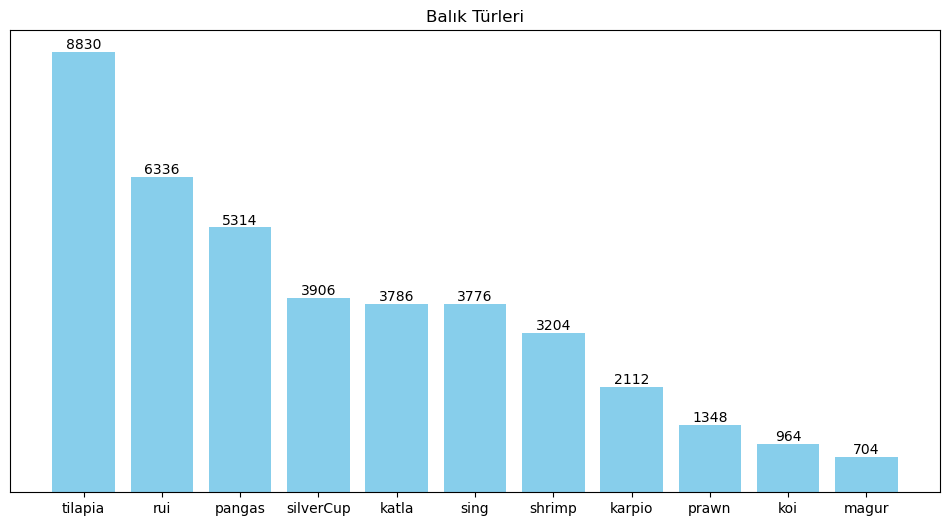

In [17]:
def bar_plot(variable):
    var = train_df[variable]  # Kategorik sütunu al
    varValue = var.value_counts()  # Her bir kategori ve adetlerini al
    
    # Grafik boyutlarını ayarla
    plt.figure(figsize = (12,6))
    plt.bar(varValue.index, varValue)  # Çubuk grafiği oluştur
    plt.xticks(varValue.index, varValue.index.values)  # X ekseni değerlerini ayarla
    plt.ylabel("")  # Y ekseni etiketini kaldır
    plt.yticks([])  # Y ekseni değerlerini gizle
    plt.xlabel("")  # X ekseni etiketini kaldır
    plt.title("Balık Türleri")  # Grafiğe başlık ekle
    
    # Çubukların üstüne adet yazdır
    bars = plt.bar(varValue.index, varValue, color='skyblue')
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, 
                 bar.get_height(), 
                 str(int(bar.get_height())),  # Değeri tam sayı olarak yaz
                 ha='center', va='bottom')  # Ortala ve çubuğun üstüne yerleştir
        
    # Grafiği göster
    plt.show()
    
# Balık türlerinin grafiğini oluştur
bar_plot("fish")

### Sayısal Verilerin Görselleştirilmesi (pH, Bulanıklık, Sıcaklık)

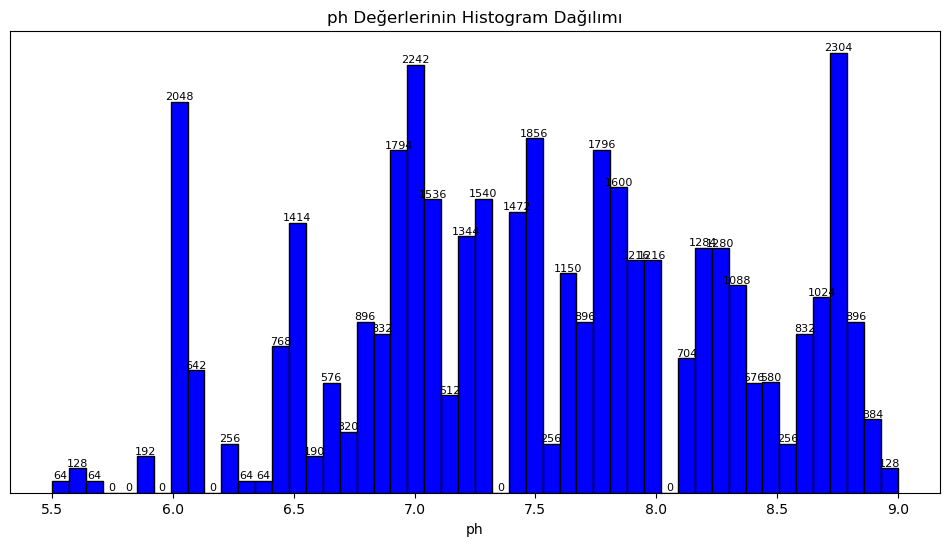

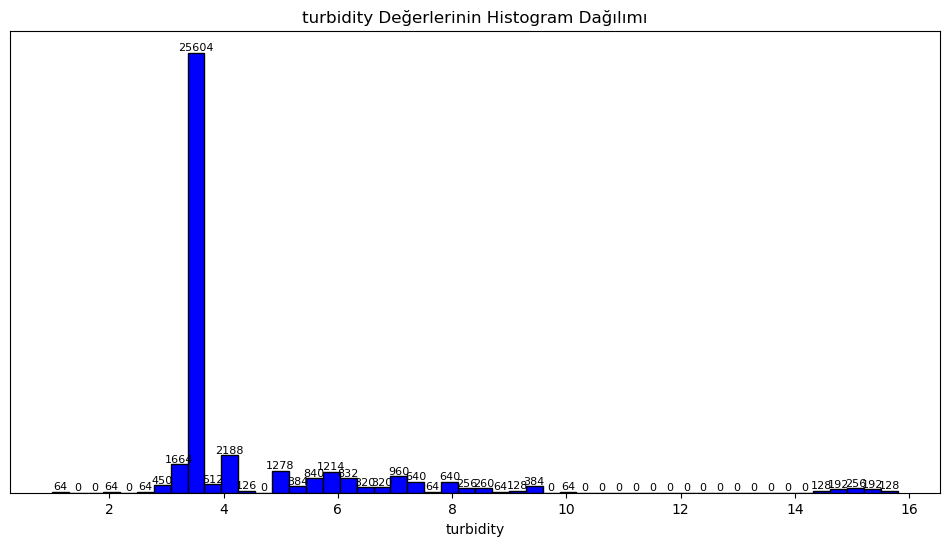

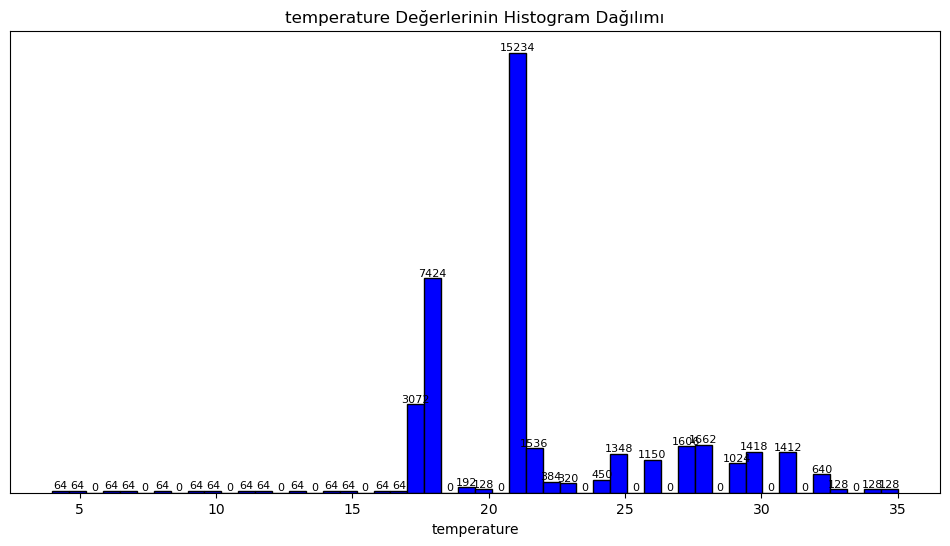

In [19]:
def plot_hist(variable):
    # Grafik boyutları
    plt.figure(figsize=(12, 6))
    
    # Histogram oluştur
    counts, bins, bars = plt.hist(train_df[variable], bins=50, color="blue", edgecolor="black")
    
    # Her çubuğun üzerine metin ekle
    for i in range(len(bins)-1):
        plt.text((bins[i] + bins[i+1]) / 2,  # Çubuğun yatay merkezi
                 counts[i],                  # Çubuğun yüksekliği
                 str(int(counts[i])),        # Adet bilgisini tam sayı olarak ekle
                 ha='center', va='bottom', fontsize=8)
    
    # Ekseni etiketle
    plt.xlabel(variable)
    plt.ylabel("")  # Y eksenindeki metni kaldır
    plt.yticks([])  # Y eksenindeki sayıları gizle
    plt.title(f"{variable} Değerlerinin Histogram Dağılımı")
    plt.show()

# Sayısal değişkenlerin listesi
numericVar = ["ph", "turbidity", "temperature"]

# Her bir sayısal değişken için histogram çiz
for n in numericVar:
    plot_hist(n)


### Balık Türlerine Göre Verilerin Ortalaması

In [21]:
train_df[["ph","temperature", "turbidity", "fish"]].groupby(["fish"], as_index = False).mean().sort_values(by="fish",ascending = True)

,fish,ph,temperature,turbidity
0,karpio,7.236364,19.363636,7.684848
1,katla,7.686529,23.184216,3.742779
2,koi,6.680913,26.016598,4.616100
3,magur,7.236364,25.181818,7.709091
4,pangas,8.459932,21.545352,3.687828
5,prawn,7.896142,28.899110,6.416202
6,rui,7.062020,22.430707,3.749495
7,shrimp,7.153596,22.138814,6.829775
8,silverCup,6.820241,22.231546,3.885407
9,sing,7.325980,23.493263,4.479619


### <font color = 'blue'>Aykırı Değerlerin Tespiti (1. Çalışma)

Veri analizinin kalitesini arttırmak ve genel veriyi temsil eden bir yaklaşım ortaya koymak adına, alt limit ve üst limit yöntemine dayalı IQR (Interquartile Range, Çeyrekler Arası Genişlik) yöntemi ile veri setimizdeki uç değerler tespit edilerek veri setinden çıkartılmıştır.

Q1 ve Q3 veri setinin küçükten büyüğe doğru sıralı değerlerinden hesaplanır. Daha sonrasından alt ve üst limit aşağıdaki formüllerle belirlenir. 

Formüllerdeki 1,5 katsayısı deneysel bir sabittir, yani bir teoriden ziyade pratik gözlemlere ve kabul görmüş standartlara neticesinde dayanır.

Alt limit=Q1-1,5∙IQR

Üst limit= Q3+1,5∙IQR

Alt ve üst sınır dışında kalan tüm veriler aykırı değer olarak kabul edilir.

#### Alt Limitlerin Belirlenmesi (Q1 - 1.5 * IQR)

In [25]:
lower_limit_ph = np.percentile(train_df["ph"], 25) - \
                (1.5 * (np.percentile(train_df["ph"], 75) - \
                        np.percentile(train_df["ph"], 25)))

lower_limit_temperature = np.percentile(train_df["temperature"], 25) - \
                        (1.5 * (np.percentile(train_df["temperature"], 75) - \
                                np.percentile(train_df["temperature"], 25)))

lower_limit_turbidity = np.percentile(train_df["turbidity"], 25) - \
                        (1.5 * (np.percentile(train_df["turbidity"], 75) - \
                                np.percentile(train_df["turbidity"], 25)))

print(f"pH Alt Limit: {lower_limit_ph}")
print(f"Bulaniklik Alt Limit: {lower_limit_turbidity}")
print(f"Sicaklik Alt Limit: {lower_limit_temperature}")


pH Alt Limit: 5.105
Bulaniklik Alt Limit: 2.5199999999999996
Sicaklik Alt Limit: 7.5


#### Üst Limitlerin Belirlenmesi (Q3 + 1.5 * IQR)

In [27]:
upper_limit_ph = np.percentile(train_df["ph"], 75) + \
                 (1.5 * (np.percentile(train_df["ph"], 75) - \
                         np.percentile(train_df["ph"], 25)))

upper_limit_turbidity = np.percentile(train_df["turbidity"], 75) + \
                        (1.5 * (np.percentile(train_df["turbidity"], 75) - \
                                np.percentile(train_df["turbidity"], 25)))

upper_limit_temperature = np.percentile(train_df["temperature"], 75) + \
                          (1.5 * (np.percentile(train_df["temperature"], 75) - \
                                  np.percentile(train_df["temperature"], 25)))

print(f"pH Ust Limit: {upper_limit_ph}")
print(f"Bulaniklik Ust Limit: {upper_limit_turbidity}")
print(f"Sicaklik Ust Limit: {upper_limit_temperature}")

pH Ust Limit: 10.024999999999999
Bulaniklik Ust Limit: 5.08
Sicaklik Ust Limit: 35.5


<img src="iqr.png" alt="Logo" style="display:block; margin-left:auto; margin-right:auto;">

#### Aykırı Değerlerin Veri Setinden Çıkartılması (1. Çalışma)

In [30]:
#pH icin aykiri degerler
outliers_ph = train_df.loc[(train_df["ph"] < lower_limit_ph) | (train_df["ph"] > upper_limit_ph)]
print(f"pH icin aykiri deger adedi: {len(outliers_ph)}")

#bulaniklik icin aykiri degerler
outliers_turbidity = train_df.loc[(train_df["turbidity"] < lower_limit_turbidity) | (train_df["turbidity"] > upper_limit_turbidity)]
print(f"Bulaniklik icin aykiri deger adedi: {len(outliers_turbidity)}")

#sicaklik icin aykiri degerler
outliers_temperature = train_df.loc[(train_df["temperature"] < lower_limit_temperature) | (train_df["temperature"] > upper_limit_temperature)]
print(f"Sicaklik icin aykiri deger adedi: {len(outliers_temperature)}")

#veri setinden cikar
original_count = len(train_df)
train_df = train_df.loc[
    (train_df["ph"] >= lower_limit_ph) & 
    (train_df["ph"] <= upper_limit_ph) &
    (train_df["temperature"] >= lower_limit_temperature) & 
    (train_df["temperature"] <= upper_limit_temperature) &
    (train_df["turbidity"] >= lower_limit_turbidity) & 
    (train_df["turbidity"] <= upper_limit_turbidity)]

filtered_count = len(train_df)
outlier_count = original_count - filtered_count
print(f"Kaldirilan aykiri degerlerin toplam adedi: {outlier_count}")

pH icin aykiri deger adedi: 0
Bulaniklik icin aykiri deger adedi: 8458
Sicaklik icin aykiri deger adedi: 256
Kaldirilan aykiri degerlerin toplam adedi: 8522


Aykırı değerlerin veri setinden çıkartılması ile ilgili yaptığımız 1. çalışma sonucunda veri setimizin son durumu ve kategorik verilerin grafiği şu şekildedir;

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31758 entries, 0 to 40279
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           31758 non-null  float64
 1   temperature  31758 non-null  float64
 2   turbidity    31758 non-null  float64
 3   fish         31758 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.2+ MB


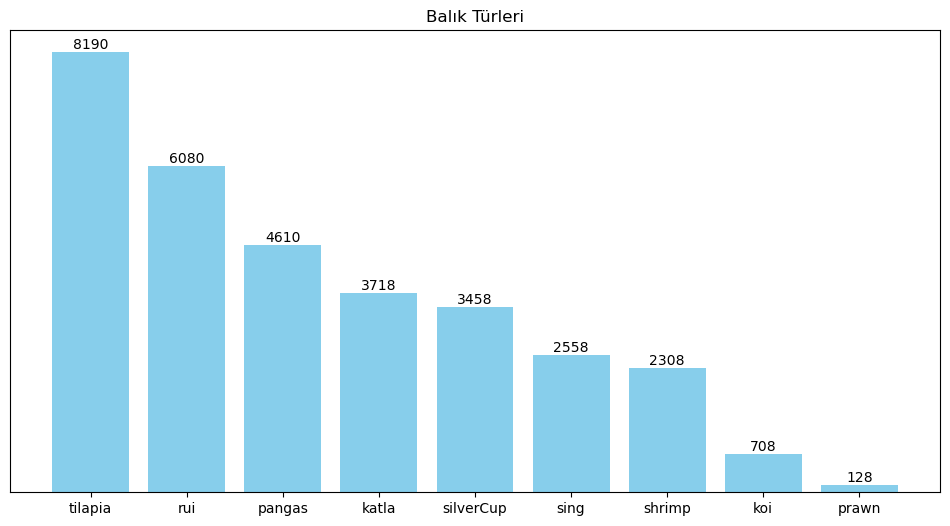

In [33]:
bar_plot("fish")

Veri setimizin son halinde karpio ve magur türü artık yer almamaktadır, toplam balık türümüz 9’a düşmüştür.

### Görselleştirme

#### pH Değerlerinin Balık Türlerine Göre Dağılımı

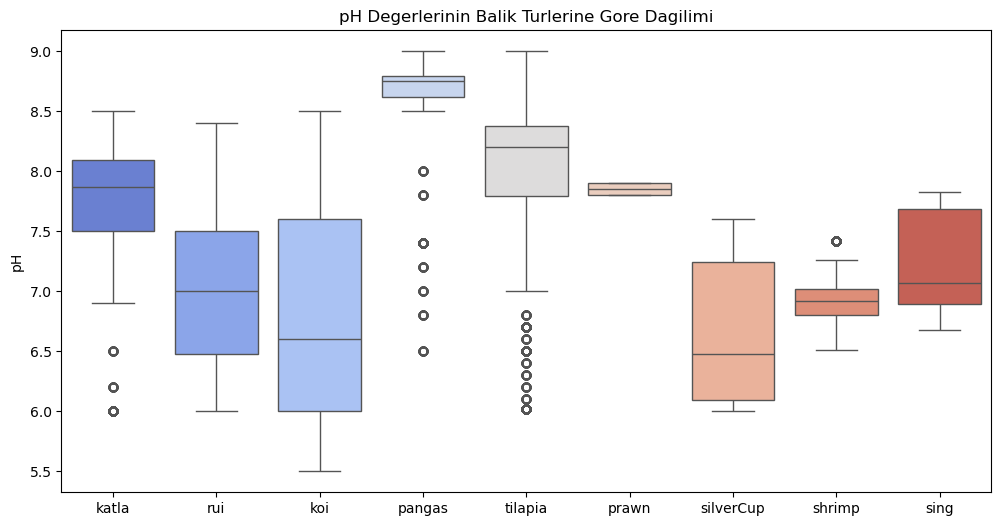

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fish', y='ph', data=train_df, palette='coolwarm')
plt.title("pH Degerlerinin Balik Turlerine Gore Dagilimi")
plt.xlabel("")
plt.ylabel("pH")
plt.show()

#### Bulanıklık Değerlerinin Balık Türlerine Göre Dağılımı

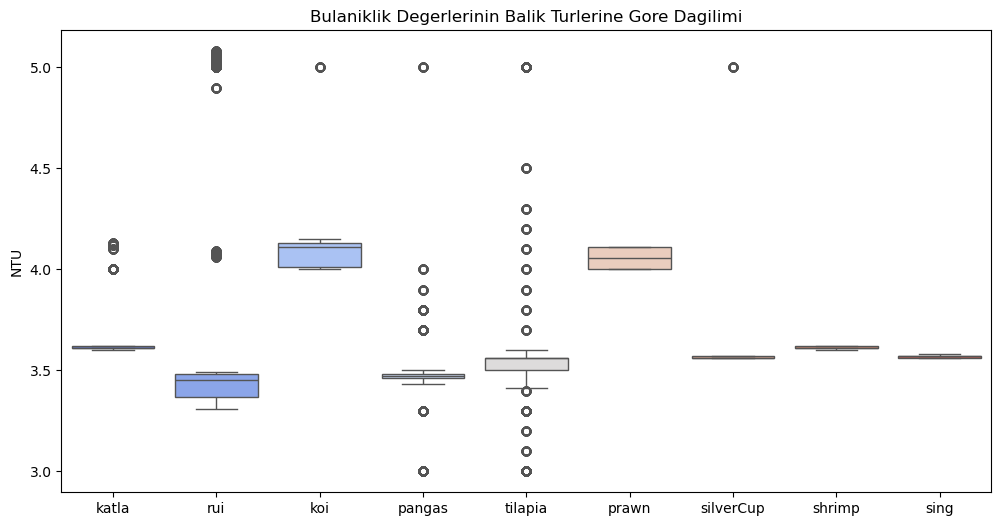

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fish', y='turbidity', data=train_df, palette='coolwarm')
plt.title("Bulaniklik Degerlerinin Balik Turlerine Gore Dagilimi")
plt.xlabel("")
plt.ylabel("NTU")
plt.show()

#### Sıcaklık Değerlerinin Balık Türlerine Göre Dağılımı

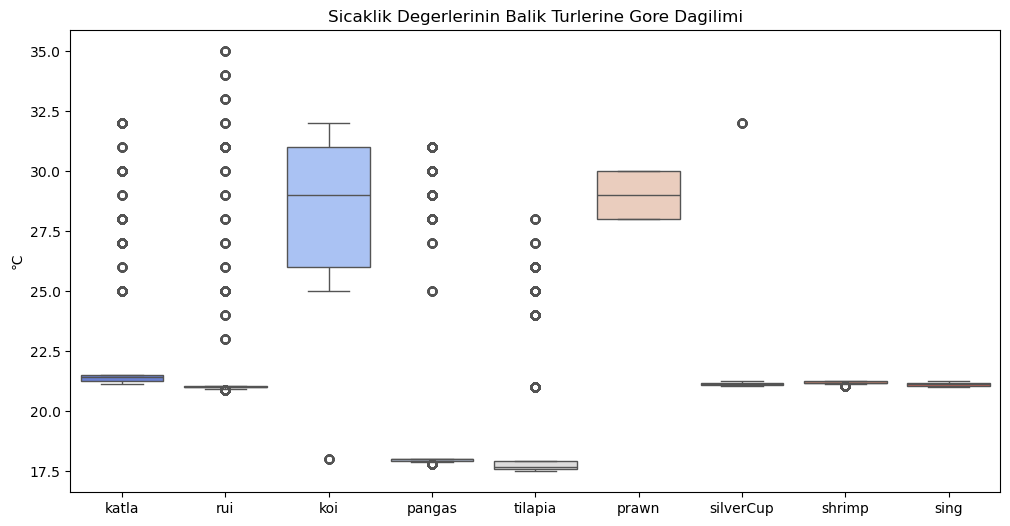

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='fish', y='temperature', data=train_df, palette='coolwarm')
plt.title("Sicaklik Degerlerinin Balik Turlerine Gore Dagilimi")
plt.xlabel("")
plt.ylabel("℃")
plt.show()

#### Aykırı Değerlerin Tespiti (2. Çalışma)

#### Balık Türlerine Göre Alt Limitlerin Belirlenmesi (Q1 - 1.5 * IQR)

In [44]:
# Alt limit değerlerini belirlemek için bir fonksiyon
def calculate_lower_limits(df, variable):
    lower_limits = {}
    for fish_type in df["fish"].unique():
        species_data = df[df["fish"] == fish_type]
        lower_limit = np.percentile(species_data[variable], 25) - 1.5 * (
            np.percentile(species_data[variable], 75) - np.percentile(species_data[variable], 25)
        )
        lower_limits[fish_type] = lower_limit
    return lower_limits

# pH, bulanıklık ve sıcaklık için alt limitleri hesaplama
ph_lower_limits = calculate_lower_limits(train_df, "ph")
turbidity_lower_limits = calculate_lower_limits(train_df, "turbidity")
temperature_lower_limits = calculate_lower_limits(train_df, "temperature")

# Alt limitleri bir tabloya dönüştürme
lower_limits_df = pd.DataFrame({
    "Balik Turu": train_df["fish"].unique(),
    "pH Alt Limiti": [ph_lower_limits[fish] for fish in train_df["fish"].unique()],
    "Bulaniklik Alt Limiti": [turbidity_lower_limits[fish] for fish in train_df["fish"].unique()],
    "Sicaklik Alt Limiti": [temperature_lower_limits[fish] for fish in train_df["fish"].unique()]
})

# Alt limit sonuçlarını yazdırma
print(lower_limits_df)

  Balik Turu  pH Alt Limiti  Bulaniklik Alt Limiti  Sicaklik Alt Limiti
0      katla        6.61500                  3.595              20.8750
1        rui        4.95000                  3.205              20.9100
2        koi        3.60000                  3.830              18.5000
3     pangas        8.36500                  3.430              17.8500
4    tilapia        6.90500                  3.410              17.0275
5      prawn        7.65000                  3.835              25.0000
6  silverCup        4.36500                  3.545              20.9400
7     shrimp        6.47000                  3.595              21.1000
8       sing        5.69375                  3.545              20.8650


#### Balık Türlerine Göre Üst Limitlerin Belirlenmesi (Q1 + 1.5 * IQR)

In [46]:
# Üst limit değerlerini belirlemek için bir fonksiyon yazalım
def calculate_upper_limits(df, variable):
    upper_limits = {}
    for fish_type in df["fish"].unique():
        species_data = df[df["fish"] == fish_type]
        upper_limit = np.percentile(species_data[variable], 75) + 1.5 * (
            np.percentile(species_data[variable], 75) - np.percentile(species_data[variable], 25)
        )
        upper_limits[fish_type] = upper_limit
    return upper_limits

# pH, bulanıklık ve sıcaklık için üst limitleri hesaplama
ph_upper_limits = calculate_upper_limits(train_df, "ph")
turbidity_upper_limits = calculate_upper_limits(train_df, "turbidity")
temperature_upper_limits = calculate_upper_limits(train_df, "temperature")

# Üst limitleri bir tabloya dönüştürme
upper_limits_df = pd.DataFrame({
    "Balik Turu": train_df["fish"].unique(),
    "pH Ust Limiti": [ph_upper_limits[fish] for fish in train_df["fish"].unique()],
    "Bulaniklik Ust Limiti": [turbidity_upper_limits[fish] for fish in train_df["fish"].unique()],
    "Sicaklik Ust Limiti": [temperature_upper_limits[fish] for fish in train_df["fish"].unique()]
})

# Alt limit sonuçlarını yazdırma
print(upper_limits_df)

  Balik Turu  pH Ust Limiti  Bulaniklik Ust Limiti  Sicaklik Ust Limiti
0      katla        8.97500                  3.635              21.8750
1        rui        9.03000                  3.645              21.1500
2        koi       10.00000                  4.310              38.5000
3     pangas        9.04500                  3.510              18.0900
4    tilapia        9.26500                  3.650              18.4875
5      prawn        8.05000                  4.275              33.0000
6  silverCup        8.96500                  3.585              21.3400
7     shrimp        7.35000                  3.635              21.3400
8       sing        8.88375                  3.585              21.3850


#### Aykırı Değerlerin Çıkartılması (2. Çalışma)

In [48]:
# Aykırı değer tespiti fonksiyonu
def is_outlier(row, variable, lower_limits, upper_limits):
    return (row[variable] < lower_limits[row["fish"]]) or (row[variable] > upper_limits[row["fish"]])

# pH için aykırı değerler
outliers_ph = train_df[train_df.apply(lambda row: is_outlier(row, "ph", ph_lower_limits, ph_upper_limits), axis=1)]
print(f"pH icin aykiri deger adedi: {len(outliers_ph)}")

# Bulanıklık için aykırı değerler
outliers_turbidity = train_df[train_df.apply(lambda row: is_outlier(row, "turbidity", turbidity_lower_limits, turbidity_upper_limits), axis=1)]
print(f"Bulaniklik icin aykiri deger adedi: {len(outliers_turbidity)}")

# Sıcaklık için aykırı değerler
outliers_temperature = train_df[train_df.apply(lambda row: is_outlier(row, "temperature", temperature_lower_limits, temperature_upper_limits), axis=1)]
print(f"Sicaklik icin aykiri deger adedi: {len(outliers_temperature)}")

# Aykırı değerleri veri setinden çıkarma
original_count = len(train_df)
train_df = train_df[
    ~train_df.apply(lambda row: is_outlier(row, "ph", ph_lower_limits, ph_upper_limits), axis=1) &
    ~train_df.apply(lambda row: is_outlier(row, "turbidity", turbidity_lower_limits, turbidity_upper_limits), axis=1) &
    ~train_df.apply(lambda row: is_outlier(row, "temperature", temperature_lower_limits, temperature_upper_limits), axis=1)
]

filtered_count = len(train_df)
outlier_count = original_count - filtered_count
print(f"Kaldirilan aykiri degerlerin toplam adedi: {outlier_count}")


pH icin aykiri deger adedi: 2366
Bulaniklik icin aykiri deger adedi: 4166
Sicaklik icin aykiri deger adedi: 6342
Kaldirilan aykiri degerlerin toplam adedi: 7110


#### Veri Setimizin Son Hali

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24648 entries, 57 to 40278
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           24648 non-null  float64
 1   temperature  24648 non-null  float64
 2   turbidity    24648 non-null  float64
 3   fish         24648 non-null  object 
dtypes: float64(3), object(1)
memory usage: 962.8+ KB


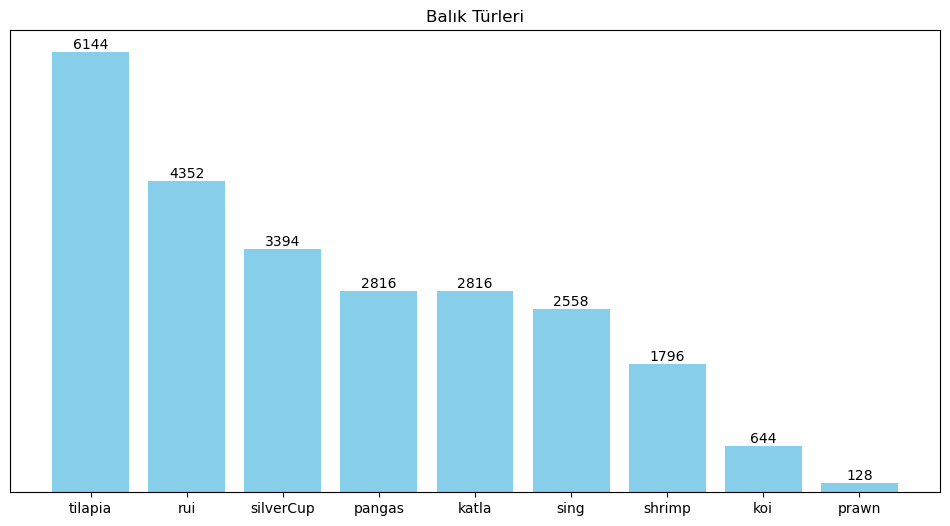

In [51]:
bar_plot("fish")

#### Sayısal Verilerin Korelasyonu

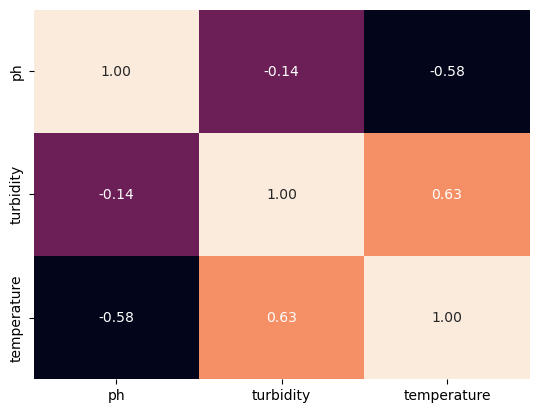

In [53]:
list1 = ["ph", "turbidity", "temperature"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt=".2f", cbar=False)
plt.show() 

pH – bulanıklık (-0.14)
Zayıf ve negatif bir ilişki söz konusudur. Doğrudan birbirlerini etkiledikleri söylenemez.

pH – sıcaklık (-0.58)
Orta düzey ve negatif ilişki söz konusudur. Sıcaklık arttıkça pH değerinin genellikle azaldığını veya tersi bir ilişki olduğunu göstermektedir.

Bulanık – sıcaklık (0.63)
Güçlü ve pozitif bir ilişki söz konusudur. Sıcaklık artışının sudaki mikroorganizma artışına sebep olarak bulanıklığı arttırdığı söylenebilir.

### <font color = 'red'> VERİ MODELLEME

#### Kullanılan Python Kütüphaneleri

In [57]:
# Veri setini egitim ve test olarak ayirmak icin
from sklearn.model_selection import train_test_split, GridSearchCV  

# Lojistik regresyon modeli icin
from sklearn.linear_model import LogisticRegression  

# Karar agaci modeli icin
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# K-En Yakın Komsu (KNN) modeli icin
from sklearn.neighbors import KNeighborsClassifier  

# Random Forest modeli icin
from sklearn.ensemble import RandomForestClassifier

# Model performansini olcmek icin
from sklearn.metrics import accuracy_score, confusion_matrix

#### Veri Setinin Eğitim ve Test Olarak Ayrılması

In [59]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = train_df[["ph", "turbidity", "temperature"]]  # Sadece mevcut sayısal sütunları kullanıyoruz
y = train_df["fish"]  # Balık türlerini hedef değişken olarak seçiyoruz

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (16514, 3)
X_test: (8134, 3)
y_train: (16514,)
y_test: (8134,)


#### <font color = 'RED'> 1) Simple Logistic Regression - SLR

#### Modeli Oluştur ve Eğit

In [62]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Eğitim Verilerinin Öğrenilme Oranı

In [64]:
acc_train_slr = round(logreg.score(X_train, y_train) * 100, 2)
print(f"SLR Egitim Dogrulugu: {acc_train_slr}%")

SLR Egitim Dogrulugu: 76.45%


#### Test Verilerinin Öğrenilme Oranı

In [66]:
acc_test_slr = round(logreg.score(X_test, y_test) * 100, 2)
print(f"SLR Test Dogrulugu: {acc_test_slr}%")

SLR Test Dogrulugu: 76.97%


#### Hata Matrisi

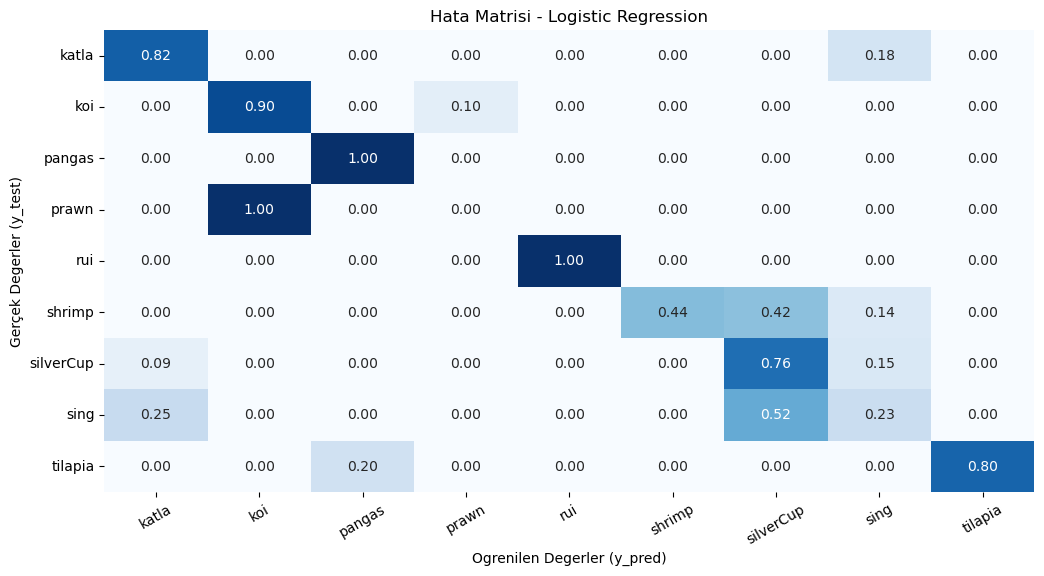

In [171]:
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisini normalize et
conf_matrix_logreg_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_logreg_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_, cbar=False)
plt.title('Hata Matrisi - Logistic Regression')
plt.xlabel('Ogrenilen Degerler (y_pred)')
plt.ylabel('Gerçek Degerler (y_test)')
plt.xticks(rotation=30)
plt.show()

#### <font color = 'RED'>2) Karar Ağaçları (Decision Tree - DT)

#### Hiperparametre (max_depth) Optimizasyonu

In [71]:
for depth in range(1, 6):  # 1'den 5'e kadar max_depth değerlerini test et
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"max_depth={depth} için dogruluk orani: {accuracy:.2f}%")

max_depth=1 için dogruluk orani: 43.35%
max_depth=2 için dogruluk orani: 64.68%
max_depth=3 için dogruluk orani: 76.48%
max_depth=4 için dogruluk orani: 89.67%
max_depth=5 için dogruluk orani: 93.14%


#### Modeli Oluştur ve Eğit

In [73]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#### Eğitim Verilerinin Öğrenilme Oranı

In [75]:
acc_train_dt = round(tree_clf.score(X_train, y_train) * 100, 2)
print(f"DT Egitim Dogrulugu: {acc_train_dt}%")

DT Egitim Dogrulugu: 89.17%


#### Test Verilerinin Öğrenilme Oranı

In [77]:
acc_test_dt = round(tree_clf.score(X_test, y_test) * 100, 2)
print(f"DT Test Dogrulugu: {acc_test_dt}%")

DT Test Dogrulugu: 89.67%


#### Hata Matrisi

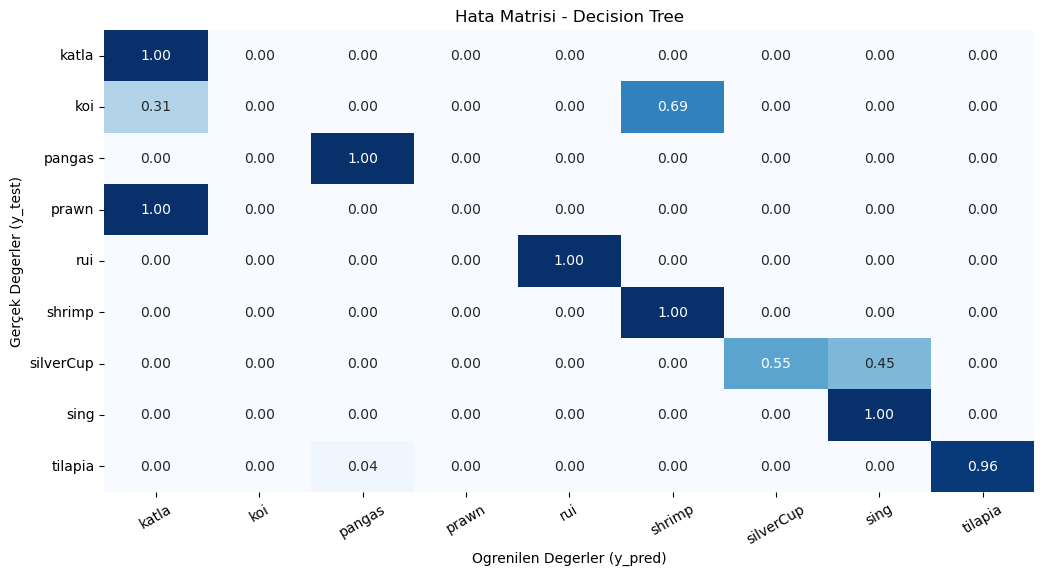

In [169]:
y_pred = tree_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisini normalize et
conf_matrix_dt_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_dt_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_, cbar=False)
plt.title('Hata Matrisi - Decision Tree')
plt.xlabel('Ogrenilen Degerler (y_pred)')
plt.ylabel('Gerçek Degerler (y_test)')
plt.xticks(rotation=30)
plt.show()

#### Karar Ağacının Görünümü

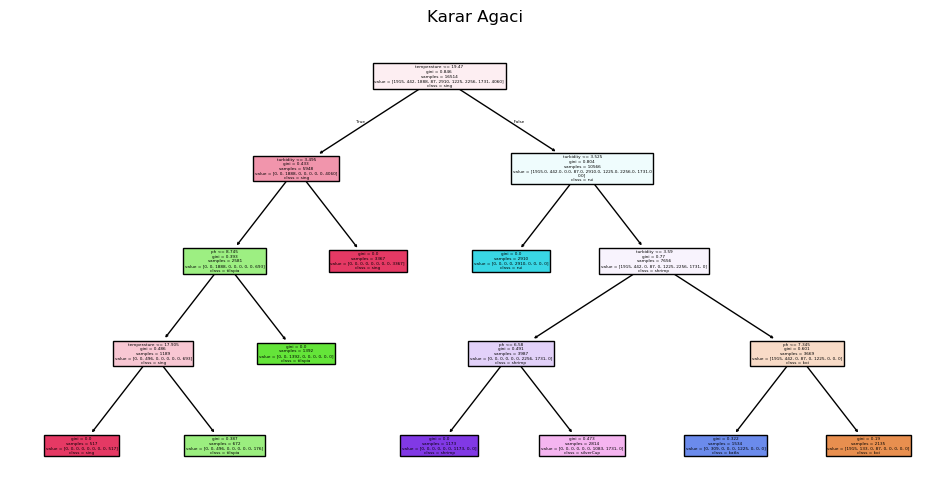

In [81]:
plt.figure(figsize=(12, 6))
plot_tree(tree_clf, filled = True, feature_names = X.columns, class_names = y.unique())
plt.title("Karar Agaci")
plt.show()

In [82]:
tree_rules = export_text(tree_clf, feature_names=list(X.columns))
print(tree_rules)

|--- temperature <= 19.47
|   |--- turbidity <= 3.50
|   |   |--- ph <= 8.74
|   |   |   |--- temperature <= 17.91
|   |   |   |   |--- class: tilapia
|   |   |   |--- temperature >  17.91
|   |   |   |   |--- class: pangas
|   |   |--- ph >  8.74
|   |   |   |--- class: pangas
|   |--- turbidity >  3.50
|   |   |--- class: tilapia
|--- temperature >  19.47
|   |--- turbidity <= 3.52
|   |   |--- class: rui
|   |--- turbidity >  3.52
|   |   |--- turbidity <= 3.59
|   |   |   |--- ph <= 6.58
|   |   |   |   |--- class: silverCup
|   |   |   |--- ph >  6.58
|   |   |   |   |--- class: sing
|   |   |--- turbidity >  3.59
|   |   |   |--- ph <= 7.35
|   |   |   |   |--- class: shrimp
|   |   |   |--- ph >  7.35
|   |   |   |   |--- class: katla



#### Özelliklerin Önem Oranları

In [84]:
# Karar ağacı modelinden özellik önem oranlarını al
feature_importances = tree_clf.feature_importances_
feature_names = X.columns

# Özellik önem oranlarını yüzdesel olarak hesapla
feature_importances_data = [
    {"Ozellik": feature_name, "Onem Orani (%)": round(importance * 100, 2)}
    for importance, feature_name in zip(feature_importances, feature_names)
    if importance > 0  # Sıfır olmayan özellikleri dahil et
]

# Sonuçları bir DataFrame'e aktar ve sırala
feature_importances_df = pd.DataFrame(feature_importances_data)
feature_importances_df = feature_importances_df.sort_values(by="Onem Orani (%)", ascending=False)

# Özelliklerin önem oranlarını yazdır
print(feature_importances_df.to_string(index=False))

    Ozellik  Onem Orani (%)
  turbidity           51.31
temperature           28.07
         ph           20.63


#### <font color = 'RED'>3) K-En Yakın Komşular (K-Nearest Neighbors - KNN)

#### Hiperparametre (k) Optimizasyonu

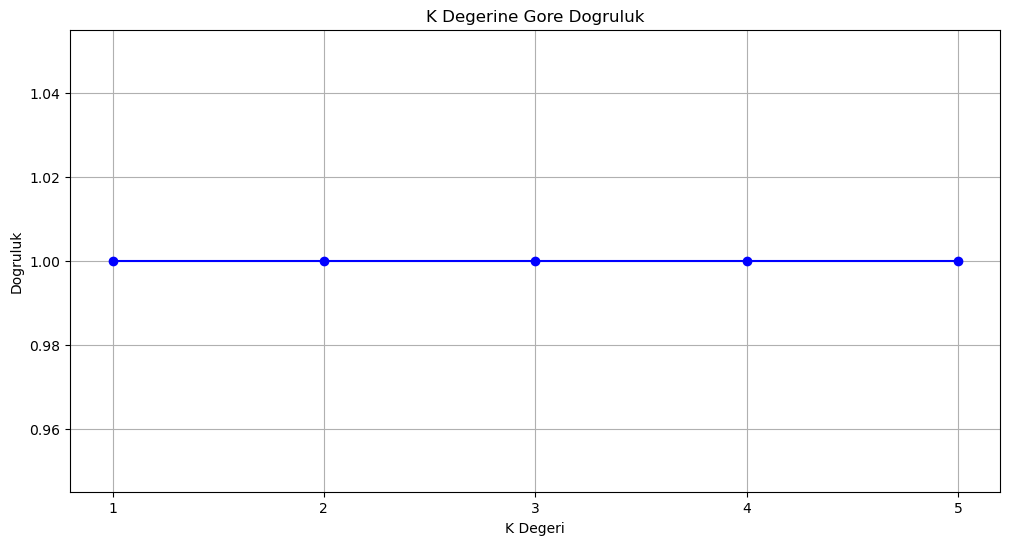

In [87]:
accuracy_values = []
k_values = []

# Farklı k degerlerini test et
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

# Dogruluk oranlarini gorsellestir
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracy_values, marker="o", linestyle="-", color="blue")
plt.title("K Degerine Gore Dogruluk")
plt.xlabel("K Degeri")
plt.ylabel("Dogruluk")
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### KNN Modeli Oluştur ve Eğit

In [89]:
best_k = accuracy_values.index(max(accuracy_values)) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Eğitim Verilerinin Öğrenilme Oranı

In [91]:
acc_train_knn = round(knn.score(X_train, y_train) * 100, 2)
print(f"KNN Eğitim Doğruluğu: {acc_train_knn}%")

KNN Eğitim Doğruluğu: 100.0%


#### Test Verilerinin Öğrenilme Oranı

In [93]:
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print(f"KNN Test Doğruluğu: {acc_test_knn}%")

KNN Test Doğruluğu: 100.0%


#### Hata Matrisi Görselleştirme

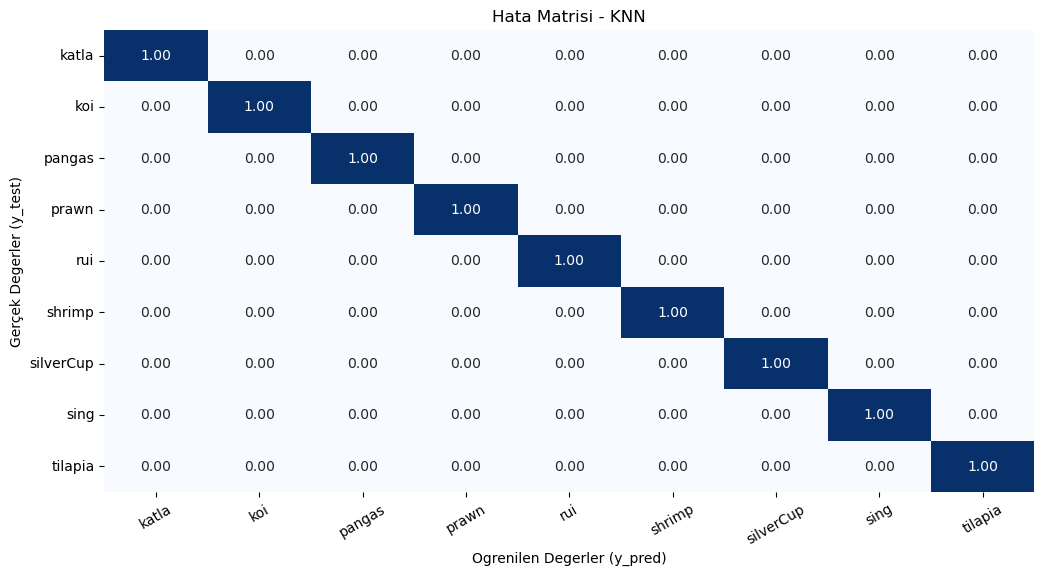

In [95]:
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisini normalize et
conf_matrix_knn_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_knn_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=logreg.classes_, yticklabels=logreg.classes_, cbar=False)
plt.title('Hata Matrisi - KNN')
plt.xlabel('Ogrenilen Degerler (y_pred)')
plt.ylabel('Gerçek Degerler (y_test)')
plt.xticks(rotation=30)
plt.show()

#### <font color = 'RED'> 4) Rastgele Orman (Random Forest - RF)

#### Hiperparametre Optimizasyonu

In [98]:
# Parametre kombinasyonları için test edilecek değerler
n_estimators_list = [10, 50, 100]
max_depth_list = [2, 4, 6]
min_samples_split_list = [2, 5]

# Sonuçları saklamak için bir liste
results = []

# Tüm kombinasyonları test et
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            rf_clf = RandomForestClassifier(
                n_estimators=n_estimators,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                random_state=42
            )
            rf_clf.fit(X_train, y_train)
            acc_train = rf_clf.score(X_train, y_train) * 100
            acc_test = rf_clf.score(X_test, y_test) * 100
            results.append({
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split,
                "Egitim Dogrulugu (%)": round(acc_train, 2),
                "Test Dogrulugu (%)": round(acc_test, 2)
            })

# Sonuçları DataFrame'e dönüştür
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Test Dogrulugu (%)", ascending=False)

# Sonuçları yazdır
print(results_df)

    n_estimators  max_depth  min_samples_split  Egitim Dogrulugu (%)  \
17           100          6                  5                 98.81   
10            50          6                  2                 98.81   
16           100          6                  2                 98.81   
11            50          6                  5                 98.81   
4             10          6                  2                 97.90   
5             10          6                  5                 97.90   
15           100          4                  5                 95.58   
14           100          4                  2                 95.58   
9             50          4                  5                 95.58   
8             50          4                  2                 95.58   
3             10          4                  5                 90.00   
2             10          4                  2                 90.00   
7             50          2                  5                 7

#### Modeli Oluştur ve Eğit

In [100]:
# Modeli tanımla ve eğit
rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    min_samples_split=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=50,
                       random_state=42)

#### Eğitim Verilerinin Öğrenilme Oranı

In [102]:
acc_train_rf = round(rf_clf.score(X_train, y_train) * 100, 2)
print(f"RF Egitim Dogrulugu: {acc_train_rf}%")

RF Egitim Dogrulugu: 95.58%


#### Test Verilerinin Öğrenilme Oranı

In [104]:
acc_test_rf = round(rf_clf.score(X_test, y_test) * 100, 2)
print(f"RF Test Dogrulugu: {acc_test_rf}%")

RF Test Dogrulugu: 95.6%


#### Hata Matrisi

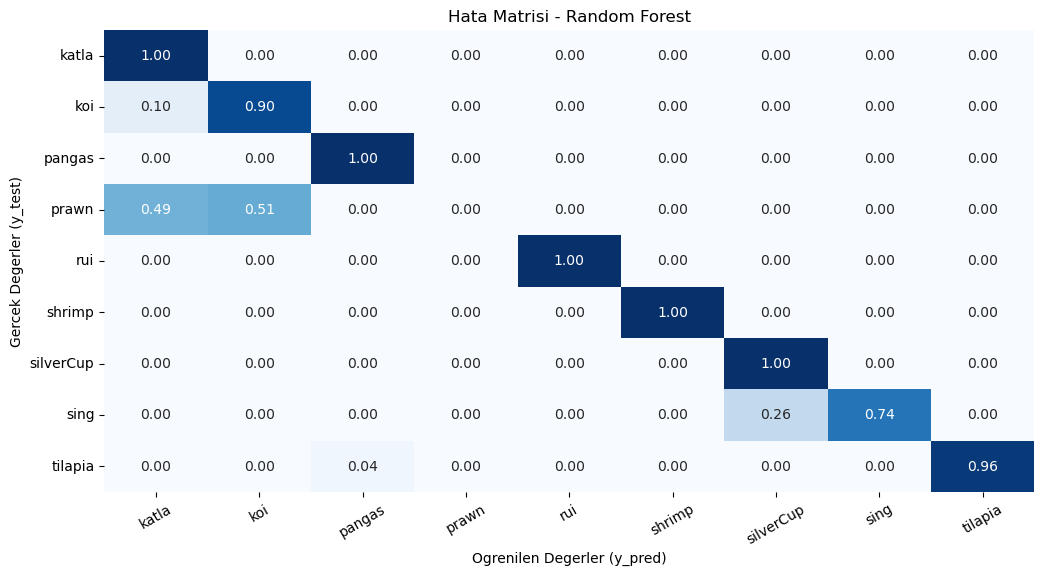

In [106]:
y_pred = rf_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Hata matrisini normalize et
conf_matrix_rf_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix_rf_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_, cbar=False)
plt.title('Hata Matrisi - Random Forest')
plt.xlabel('Ogrenilen Degerler (y_pred)')
plt.ylabel('Gercek Degerler (y_test)')
plt.xticks(rotation=30)
plt.show()

#### İlk Karar Ağacının Görünümü

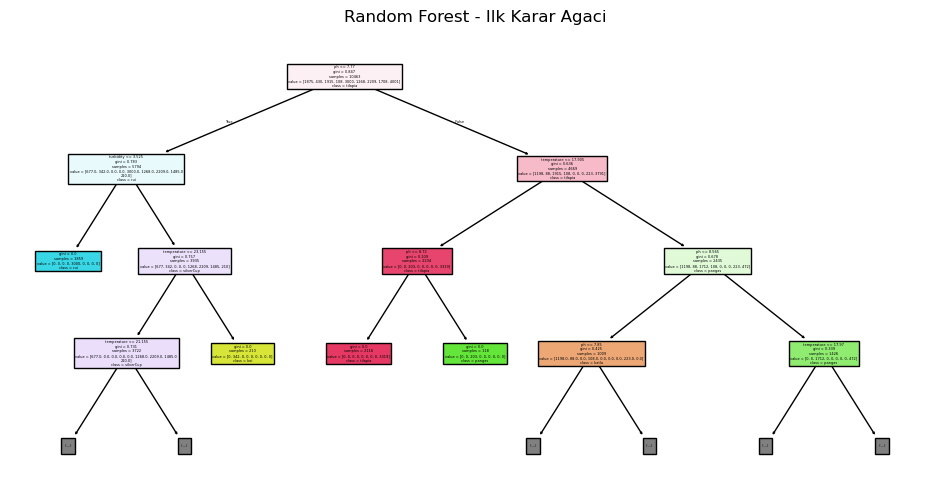

In [108]:
# İlk ağacı görselleştir
plt.figure(figsize=(12, 6))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X.columns, class_names=rf_clf.classes_, max_depth=3)
plt.title("Random Forest - Ilk Karar Agaci")
plt.show()

In [109]:
# Sınıf adlarını modele ekleyin
class_names = list(y.unique())

# İlk karar agacini metin formatinda gorsellestir
tree_rules = export_text(
    rf_clf.estimators_[0],  # İlk karar agacini sec
    feature_names=list(X.columns),  # Ozellik isimleri
    class_names=[str(cls) for cls in class_names]  # Sinif isimlerini ekle
)

print(tree_rules)

|--- ph <= 7.77
|   |--- turbidity <= 3.52
|   |   |--- class: rui
|   |--- turbidity >  3.52
|   |   |--- temperature <= 23.15
|   |   |   |--- temperature <= 21.16
|   |   |   |   |--- class: shrimp
|   |   |   |--- temperature >  21.16
|   |   |   |   |--- class: katla
|   |   |--- temperature >  23.15
|   |   |   |--- class: prawn
|--- ph >  7.77
|   |--- temperature <= 17.91
|   |   |--- ph <= 8.72
|   |   |   |--- class: sing
|   |   |--- ph >  8.72
|   |   |   |--- class: tilapia
|   |--- temperature >  17.91
|   |   |--- ph <= 8.57
|   |   |   |--- ph <= 7.85
|   |   |   |   |--- class: silverCup
|   |   |   |--- ph >  7.85
|   |   |   |   |--- class: koi
|   |   |--- ph >  8.57
|   |   |   |--- temperature <= 17.97
|   |   |   |   |--- class: tilapia
|   |   |   |--- temperature >  17.97
|   |   |   |   |--- class: tilapia



#### Modelin Kaydedilmesi

In [111]:
# Modeli .pkl dosyasina kaydet
import joblib
joblib.dump(rf_clf, "veri_modeli_son.pkl")
print("Model basari ile kaydedildi!")

Model basari ile kaydedildi!


#### Modelin Çalıştırılması

In [113]:
import os

def manual_rf_prediction(ph, temperature, turbidity):
    try:
        # Model dosyasının varlığını kontrol et
        model_path = "veri_modeli_son.pkl"
        if not os.path.exists(model_path):
            print("Model dosyasi bulunamadi.")
            return

        # Modeli yükle
        rf_model = joblib.load(model_path)
        print("Model basariyla yuklendi.")
        
        # Giriş verilerini bir listeye dönüştür
        input_data = [[ph, turbidity, temperature]]
        
        # Tahmin yap
        prediction = rf_model.predict(input_data)
        
        # Tahmin sonucunu kullanıcıya göster
        print(f"Tahmin edilen balik turu: {prediction[0]}")
    except Exception as e:
        print(f"Bir hata olustu: {e}")

# Kullanıcidan giris al
try:
    print("Balik turu tahmini icin lutfen asagidaki bilgileri giriniz.")
    ph = float(input("pH degerini girin (pH): "))
    temperature = float(input("Bulanikli degerini girin (NTU): "))
    turbidity = float(input("Sicaklik degerini girin (°C): "))
    manual_rf_prediction(ph, turbidity, temperature)
except ValueError:
    print("Gecerli bir sayi girin.")

Balik turu tahmini icin lutfen asagidaki bilgileri giriniz.


pH degerini girin (pH):  5
Bulanikli degerini girin (NTU):  1
Sicaklik degerini girin (°C):  25


Model basariyla yuklendi.
Tahmin edilen balik turu: rui
